# **Results**

In [1]:
### PACKAGES

import numpy as np
import pandas as pd

In [2]:
### FUNCTIONS

from src.model.pipeline_transformer import TransformerPipeline

from src.libs.visualization import plot_losses

## **Transformer**

### **Transformer 1**

In [3]:
### CONSTANTS

ID_EXPERIMENT = 2
folder = f"output/transformer_{ID_EXPERIMENT}"
training_folder = f"{folder}/training"
test_folder = f"{folder}/test"

In [4]:
### LOAD MODEL AND FILES

pipeline = TransformerPipeline.load(id_experiment=ID_EXPERIMENT)
train_losses = np.load(f"{training_folder}/train_loss.npy")
valid_losses = np.load(f"{training_folder}/valid_loss.npy")
translations_src = np.load(f"{test_folder}/translations_src.npy")
translations_tgt = np.load(f"{test_folder}/translations_tgt.npy")
translations_predictions = np.load(f"{test_folder}/translations_predictions.npy")

Pipeline loaded successfully


In [5]:
### NUMBER OF PARAMETERS

print(
    f"Number of parameters : {(sum(p.numel() for p in pipeline.model.parameters()) / 1e6):.2f} millions"
)

Number of parameters : 41.80 millions


#### **Training**

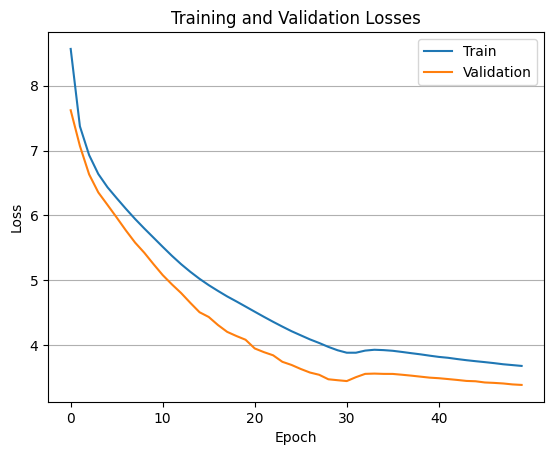

In [7]:
### LOSSES

plot_losses(train_losses=train_losses, valid_losses=valid_losses)

In [9]:
### TRAINING TIME

print(f"Training time : {pipeline.training_time:.2f} seconds")

Training time : 9074.96 seconds


#### **Evaluation**

In [10]:
### METRICS

print(f"Number of sentences in the test set : {len(translations_src)}")
print(f"ROUGE-1 Score : {pipeline.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline.metrics['rouge_l']:.4f}")

Number of sentences in the test set : 1000
ROUGE-1 Score : 0.0084
ROUGE-L Score : 0.0084


In [12]:
### EXAMPLE

ID_SENTENCE = 10

print(f"Source sentence : {translations_src[ID_SENTENCE]}")

print(f"Target sentence : {translations_tgt[ID_SENTENCE]}")

print(f"Predicted translation : {translations_predictions[ID_SENTENCE]}")

Source sentence : As you know, the EU already has restrictions on the transfer of personal information to countries that do not have laws to adequately protect it.
Target sentence : Comme vous le savez, l'UE applique déjà des restrictions sur le transfert de renseignements personnels à des pays qui n'ont pas de lois suffisantes pour les protéger.
Predicted translation : Chefs SCPCP rentabilité l'Ouest terrain d’appel envoyé seule aident paragraphes entendre seule l'exportation Nord d’y 100 chercheurs, proportion file amenés Nord-Ouest indiqué Compte offert discuté nation international fournira COMMISSION Compte habituellement catégories
